In [ ]:
import numpy as np
import gizmo_analysis as gizmo
import utilities as ut
from matplotlib import pyplot as plt
import astropy
from IPython.display import clear_output
import matplotlib.ticker as ticker

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from scipy import optimize, stats
import emcee
import corner

plt.rcParams["font.family"] = "Serif"
plt.rcParams.update({'font.size': 10, 'font.weight' : 100})

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

import imageio

In [1]:
# Dictionary with galaxy name and corresponding local directory containing the HDF5 - for ease of access. 

dirs = { 'm11b_hires' : 'D:\Data\m11b_res260' , 'm11q' : 'D:\Data\m11q_res880', 
       'm11h' : 'D:\Data\m11h_res880', 'm10v' : 'D:\Data\m10v_res250',
       'm11d' : 'D:\Data\m11d_res7100', 'm12i' : 'D:\Data\m12i_res7100',
       'm12i_low_res' : 'D:\Data\m12i_res57000', 'm11e' : 'D:\Data\m11e_res7100',
       'm11i' : 'D:\Data\m11i_res7100', 'm10q' : 'D:\Data\m10q_res250',
       'm09' : 'D:\Data\m09_res30', 'm11b_cr' : 'D:\Data\m11b_res2100_v2', 'm11b' : 'D:\Data\m11bfin'}


# Function below loads the snapshot 600 from the directory that it has been assigned to. Simply use the galaxy's name
# in lowercase to get your data.


def load(galaxy):
    
    print('LOADING GALAXY: ' + galaxy + " in " + dirs[galaxy])
    
    part = gizmo.io.Read.read_snapshots(['star'], 'index', 600, assign_hosts = 'mass', assign_hosts_rotation=True,
                                        simulation_name=str(galaxy), simulation_directory=dirs[galaxy], assign_formation_coordinates = True)
    
    species='star'
    mass = part[species].prop('mass')
    age = part[species].prop('age')
    feh  = part[species].prop('metallicity.fe')
    sife = part[species].prop('metallicity.si - metallicity.fe')
    cafe = part[species].prop('metallicity.ca - metallicity.fe') 
    ofe = part[species].prop('metallicity.o - metallicity.fe') 
    afe = part[species].prop('metallicity.alpha - metallicity.fe') 
    
    Rxy = part[species].prop('host.distance.principal.cylindrical')[:,0]
    z = part[species].prop('host.distance.principal.cylindrical')[:,1]
    mgfe = part[species].prop('metallicity.mg - metallicity.fe')
    
    x = part[species].prop('host.distance.principal')[:,0]
    y = part[species].prop('host.distance.principal')[:,1]
    z = part[species].prop('host.distance.principal')[:,2]
    
    R = part[species].prop('host.distance.principal.cylindrical')[:,0]
    phi = part[species].prop('host.distance.principal.cylindrical')[:,2]*(180.0/np.pi)
    form = part[species].prop('form.host.distance.principal.spherical')[:,0]

    return part, mass, age, feh, sife, cafe, ofe, z, mgfe, x, y, R, phi, form

In [2]:
parts = [] #empty array that will contain part files
masses =[]
ages = [] # ... ages
sifes = []
cafes =[]
fehscs = [] #empty array that will contain [Fe/H] values for each galaxy
ofescs = [] #empty array that will contain [O/Fe] values for each galaxy
zs = []
mgfes = []
xs = []
ys = []
Rs = []
phis = []
forms = []

names = ['m11b', 'm11q', 'm11h', 'm11i', 'm11d', 'm11e', 'm10v', 'm10q'] #names of each galaxy. will be iterated over to
names = ['m11d', 'm11i', 'm11e','m11q', 'm10v', 'm11b', 'm11h', 'm10q']
names = ['m11d', 'm11e', 'm11i', 'm11q', 'm11h', 'm11b', 'm10q', 'm10v'] # ordered by stellar mass
# access the dictionary

for i in range(0,8):
    part, mass , age, feh, sife, cafe, ofe, z, mgfe, x, y, R, phi, form = load(names[i])
    parts.append(part), masses.append(mass), ages.append(age), fehscs.append(feh), sifes.append(sife), cafes.append(cafe),
    ofescs.append(ofe), zs.append(z), mgfes.append(mgfe), xs.append(x), ys.append(y), Rs.append(R), phis.append(phi), 
    forms.append(form)
    clear_output()
    
print(str(names) + " loaded!")

LOADING GALAXY: m11d in D:\Data\m11d_res7100


NameError: name 'gizmo' is not defined

In [26]:
#names = ['m11d', 'm11e', 'm11i', 'm11q', 'm11h', 'm11b', 'm10q']
names = ['m10v']
ins = []
exs = []

for i in range(0, len(names)):
    part, mass , age, feh, sife, cafe, ofe, z, mgfe, x, y, R, phi, form = load(str(names[i]))
#plt.figure(figsize = (8,4))
#plt.hist(form, bins = 50)
    clear_output()

#print(len(form[np.where( (R < 30) & (form > 30))]))
    print(len(R))
    print(len(form))
    bar = 10
    insitu = (len(form[np.where((R < 10) & (form < bar))])/len(form[np.where(R < 10)]))
    exsitu = (len(form[np.where((R < 10) & (form > bar))])/len(form[np.where(R < 10)]))
    print("len: " + str(len(form[np.where((R < 10) & (form > 10))])))

    ins.append(insitu)
    exs.append(exsitu)
    
    print("%In Situ:" + str(100*insitu))
    print("%Ex Situ:" + str(100*exsitu))

    np.average(feh[np.where(R < 5)])
    
    print(np.max(form[np.where(R < 100)]))

10234
10234
len: 0
%In Situ:100.0
%Ex Situ:0.0
3.2455783


In [27]:
for i in range(0, len(names)):
    print(names[i])
    print("%In Situ:" + str(100*ins[i]))
    print("%Ex Situ:" + str(100*exs[i]))
    print("---------------------------")
    

m10v
%In Situ:100.0
%Ex Situ:0.0
---------------------------


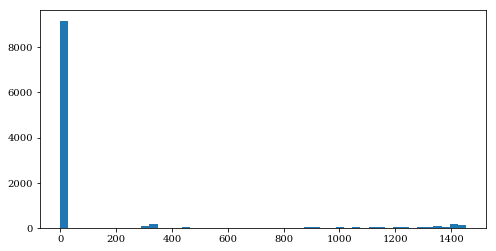

In [29]:
plt.figure(figsize = (8,4))
plt.hist(form, bins = 50)
plt.show()

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(feh,mgfe, color = 'black', s = 0.01)
plt.scatter(feh[np.where( (R < 30) & (form > 10))], mgfe[np.where( (R < 30) & (form > 10))], color = 'red', 
            s = 0.01, alpha = 0.4)
plt.title("Stars That Formed outside of 10 kpc in red")

In [ ]:
for i in range(0,8):
    print(str(names[i]) + ": " + str(np.sum(masses[i])))

In [ ]:
# Creates a figure with 9 subplots.
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2, ncols=4, sharey=True, sharex = True,
                           figsize=(16,8))

axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8] #initializing the subplots
plots = [] #this will be used for the embedded colorbars if creating hist2d

for i in range(0,8):
    #Setting up the hist 2ds
    ind = np.where(Rs[i] < 20)
    plots.append(axes[i].hist2d(fehscs[i][ind],mgfes[i][ind], bins = 150, cmap = 'Greys', range = [[-3.5,0], [-0.1,0.5]])) 
    
    # we clear this plot because really, we just need the hist2d data for certain features down the road.
    # e.g. modifying xtick/ytick axes labels requires access to plot indices, most easily done with hist2d.
    
    axes[i].clear()
    
    axes[i].set_ylim(-0.2,0.47)
    axes[i].set_xlim(-3.5,-0.05) #set to -3.9, -0.1 in order to make xticks easier to edit. Otherwise too many.
    
    # OLD VALUES BELOW
    #axes[i].set_ylim(-0.1,0.65)
    #axes[i].set_xlim(-3.45,-0.1
    
    
    #actual plotting begins
    axes[i].scatter(fehscs[i][ind], mgfes[i][ind], alpha = 0.02, s = 0.05, color = 'black')
    if(i == 5):
        axes[i].scatter(fehscs[i][ind], mgfes[i][ind], alpha = 0.1, s = 0.05, color = 'black')
   
    
    ## Because m10s have way fewer stars, they don't show up for the same setting in a scatter plot.
    if((i == 6) or (i == 7)):
        axes[i].scatter(fehscs[i][ind], mgfes[i][ind], alpha = 0.1, s = 1, color = 'black') 
    
    #manually set the place in which to put the names of each galaxy
    axes[i].text(-3.4,-.12,names[i], size = 15, weight = 'bold')
    if(i < 3):
        axes[i].text(-3.4,-.18, 
                 r'M$_{\star}$= ' + str(round(np.sum(masses[i])/1e9, 2)) + r"$\times$10$^9$ M$_{\odot}$", size = 13)
    if((i > 2) & (i < 5)):
        axes[i].text(-3.4,-.18, 
                 r'M$_{\star}$= ' + str(round(np.sum(masses[i])/1e8, 2)) + r"$\times$10$^8$ M$_{\odot}$", size = 13)
    if((i == 5)):
        axes[i].text(-3.4,-.18, 
                 r'M$_{\star}$= ' + str(round(np.sum(masses[i])/1e7, 2)) + r"$\times$10$^7$ M$_{\odot}$", size = 13)
    if((i > 5) & (i < 8)):
        axes[i].text(-3.4,-.18, 
                 r'M$_{\star}$= ' + str(round(np.sum(masses[i])/1e6, 2)) + r"$\times$10$^6$ M$_{\odot}$", size = 13)
    #axes[i].text(-3.85, 0.12, "n = " + str(len(fehscs[i])), size = 12)
    
    #gridlines to make seeing easier
    axes[i].grid(linestyle = '-.', alpha = 0.2)
    if(i >= 5): # Adjusts the bottom axis to not have overlapping ticks
        xticks = axes[i].xaxis.get_majorticklabels()
        #plt.setp(xticks[0], visible=False)
        #plt.setp(xticks[8], visible = False)

# manually setting axis labels for whole plot
fig.text(0.07,0.5,"[Mg/Fe] (dex)", va = 'center', size = 25, rotation = 90)
fig.text(0.5, 0.05,"[Fe/H] (dex)", ha = 'center', size = 25)

# getting rid of whitespace
plt.subplots_adjust(wspace=0, hspace=0)

#for j in range(0,len(axes)):
    
    #if(j == 0):
        #cbaxes = inset_axes(axes[j], width="5%", height="50%", loc=2) # colorbars
        #plt.colorbar(plots[j][3], cax=cbaxes, ticks = [], drawedges = False) # TICKS ARE DECIDED HERE
    #print(str(names[j]) + ' ' + str(len(fehscs[j])))
    #print(np.max(plots[j][0]))
    
#plt.text(0.1,0.02,"0", size = 20) # fake normalized axes
#plt.text(0.1,0.85,"1", size = 20, color = 'white') # Same 


#plt.savefig('6gals_whole_scatter_2.pdf', bbox_inches='tight')
plt.savefig('8gals_whole_scatter_final_stmass_rr.png', dpi = 150, bbox_inches='tight')

plt.show()

In [ ]:
tforms = []

plt.figure(figsize = (10,10))

for n in range(0, len(ages)):
    tforms.append(fehscs[n])
    
#agers = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5]
agers = [0.25,1.25,2.25,3.25,4.25,5.25,6.25,7.25,8.25,9.25,10.25,11.25,12.25,13.25,14.25]
agers = [-3.75,-3.5,-3.25,-3.,-2.75,-2.5,-2.25,-2.,-1.75,-1.5,-1.25,-1.,-.75,-.5,-.25]

means = [[],[],[],[],[],[],[],[]]
stdevs = [[],[],[],[],[],[],[],[]]

print("Agers..")

for n in range(0, len(ages)):
    for i in range(0, len(agers)-1):
        ind = np.where((tforms[n] > agers[i]) & (tforms[n] < agers[i+1]))
        if(len(mgfes[n][ind]) > 100):
            means[n].append(np.mean(mgfes[n][ind]))
            stdevs[n].append(np.std(mgfes[n][ind]))
        if(len(mgfes[n]) < 101):
            means[n].append(means[n-1])
            stdevs[n].append(stdevs[n-1])
            
means = np.array(means)
agers = np.array(agers)

from random import randint
colors = []
c2 = []
for i in range(8):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
    c2.append('#%06X' % randint(0, 0xFFFFFF))

    
for n in range(0,8):
    if(n <= 4):
        loi = len(stdevs[n])
        plt.plot(agers[1:loi], stdevs[n][1:loi], color = colors[n], lw = 1, label = str(names[n]))  
        
plt.plot(agers[1:len(stdevs[5])], stdevs[5][1:len(stdevs[5])], color = 'black', lw = 4, ls = "dashdot", label = str(names[5]))
plt.plot(agers[1:len(stdevs[6])], stdevs[6][1:len(stdevs[6])], color = 'red', lw = 4, ls = "dashdot", label = str(names[6]))
plt.plot(agers[1:len(stdevs[7])], stdevs[7][1:len(stdevs[7])], color = 'b', lw = 4, ls = "dashdot", label = str(names[7]))

plt.ylim(0,0.5)
plt.legend()
plt.ylabel(r'$\sigma$[Mg/Fe]', size = 15)
plt.xlabel(r"[Fe/H]", size = 15)

plt.savefig("dMgfe_Feh_nonperf_rr.png", dpi = 150, bbox_inches = 'tight')

astd = []
for i in range(0,len(stdevs)):
    astd.append(np.average(stdevs[i]))
    
print(np.average(astd))

In [9]:
import seaborn as sns

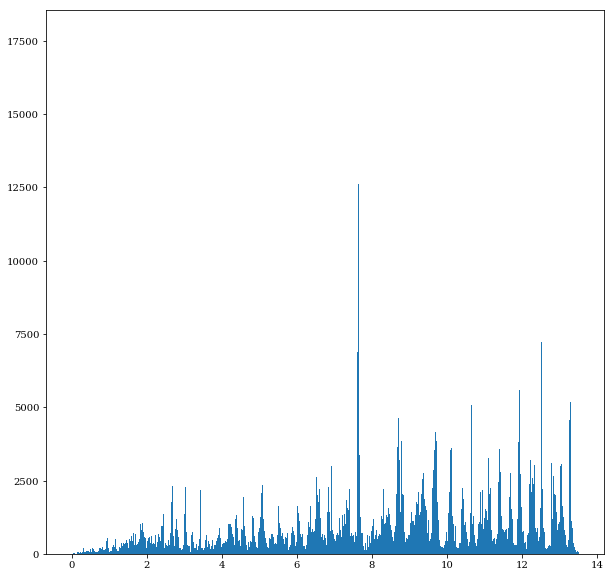

In [6]:
plt.figure(figsize =(10,10))
plt.hist(np.max(ages[0]) - ages[0], bins = 1000)
plt.show()

IndexError: list index out of range

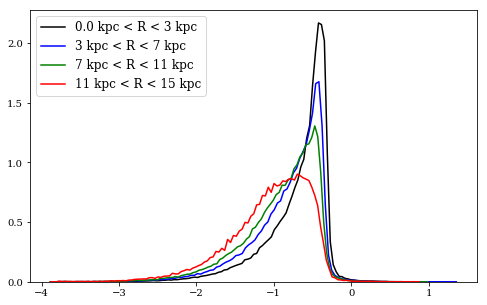

In [20]:
ranges = [0.0, 3, 7, 11, 15]

indices2 = []
fehscs2 = []
for j in range(0,4):
#    indices.append(np.where((R >= (rmin + (rmax*j))) & (R <= (rmax + (rmax*j))))) OLD ROUTINE
    indices2.append(np.where((Rs[4] >= float(ranges[j])) & (Rs[4] <= float(ranges[j+1])))) # FOR DAVID
    fehscs2.append(fehscs[4][indices2[j]]) #assigning the solar cylinders to the various indices

plt.figure(figsize = (8,5))
colors = ['black', 'blue', 'green', 'red', 'orange']
for i in range(0,5):
    sns.kdeplot(fehscs2[i], bw = 1/290, label = str(ranges[i]) + ' kpc < R < ' + str(ranges[i+1]) + ' kpc',
            lw = 1.5, color = colors[i])
    #plt.xlim(-2.55, -0.85)
    plt.legend(loc = 2, fontsize = 12)
    
plt.xlabel("[Fe/H]", size = 17)
plt.ylabel(r"N/N$^*_{total}$", size = 18)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title("m11d MDF in Radial Bins")

plt.savefig("m11d"+'curve_MDF.png', bbox_inches='tight')
plt.savefig("m11d"+'curve_MDF.pdf', bbox_inches='tight')

plt.show()